In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv("./kc_house_data.csv")


Exploratory Data Analysis (Veri setini anlama ve görselleştirme) ve Preprocessing the Data (Verinin ön işlenmesi)

In [8]:
data.shape


(21613, 21)

In [9]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Veri setindeki 'id' (kimlik) ve 'date' (tarih) sütunları, ev fiyatı tahminiyle hiçbir ilgisi olmayan benzersiz tanımlayıcıları temsil eder. Bu nedenle, bu sütunları veri setinden çıkarmayı tercih ediyoruz.

In [8]:
data = data.drop(["id", "date"], axis = 1)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.shape

(21613, 19)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [11]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [12]:
print(data['price'].mean())
print(data['price'].median())
print(data['price'].std())
print(data['price'].max())
print(data['price'].min())



540088.1417665294
450000.0
367127.19648269983
7700000.0
75000.0


Exploratory Data Analysis

Pairplot Visualisation

Let's create some Seaborn pairplots for the features ('sqft_lot','sqft_above','price','sqft_living','bedrooms') to get a feel for how the various features are distributed vis-a-vis the price as well as the number of bedrooms

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


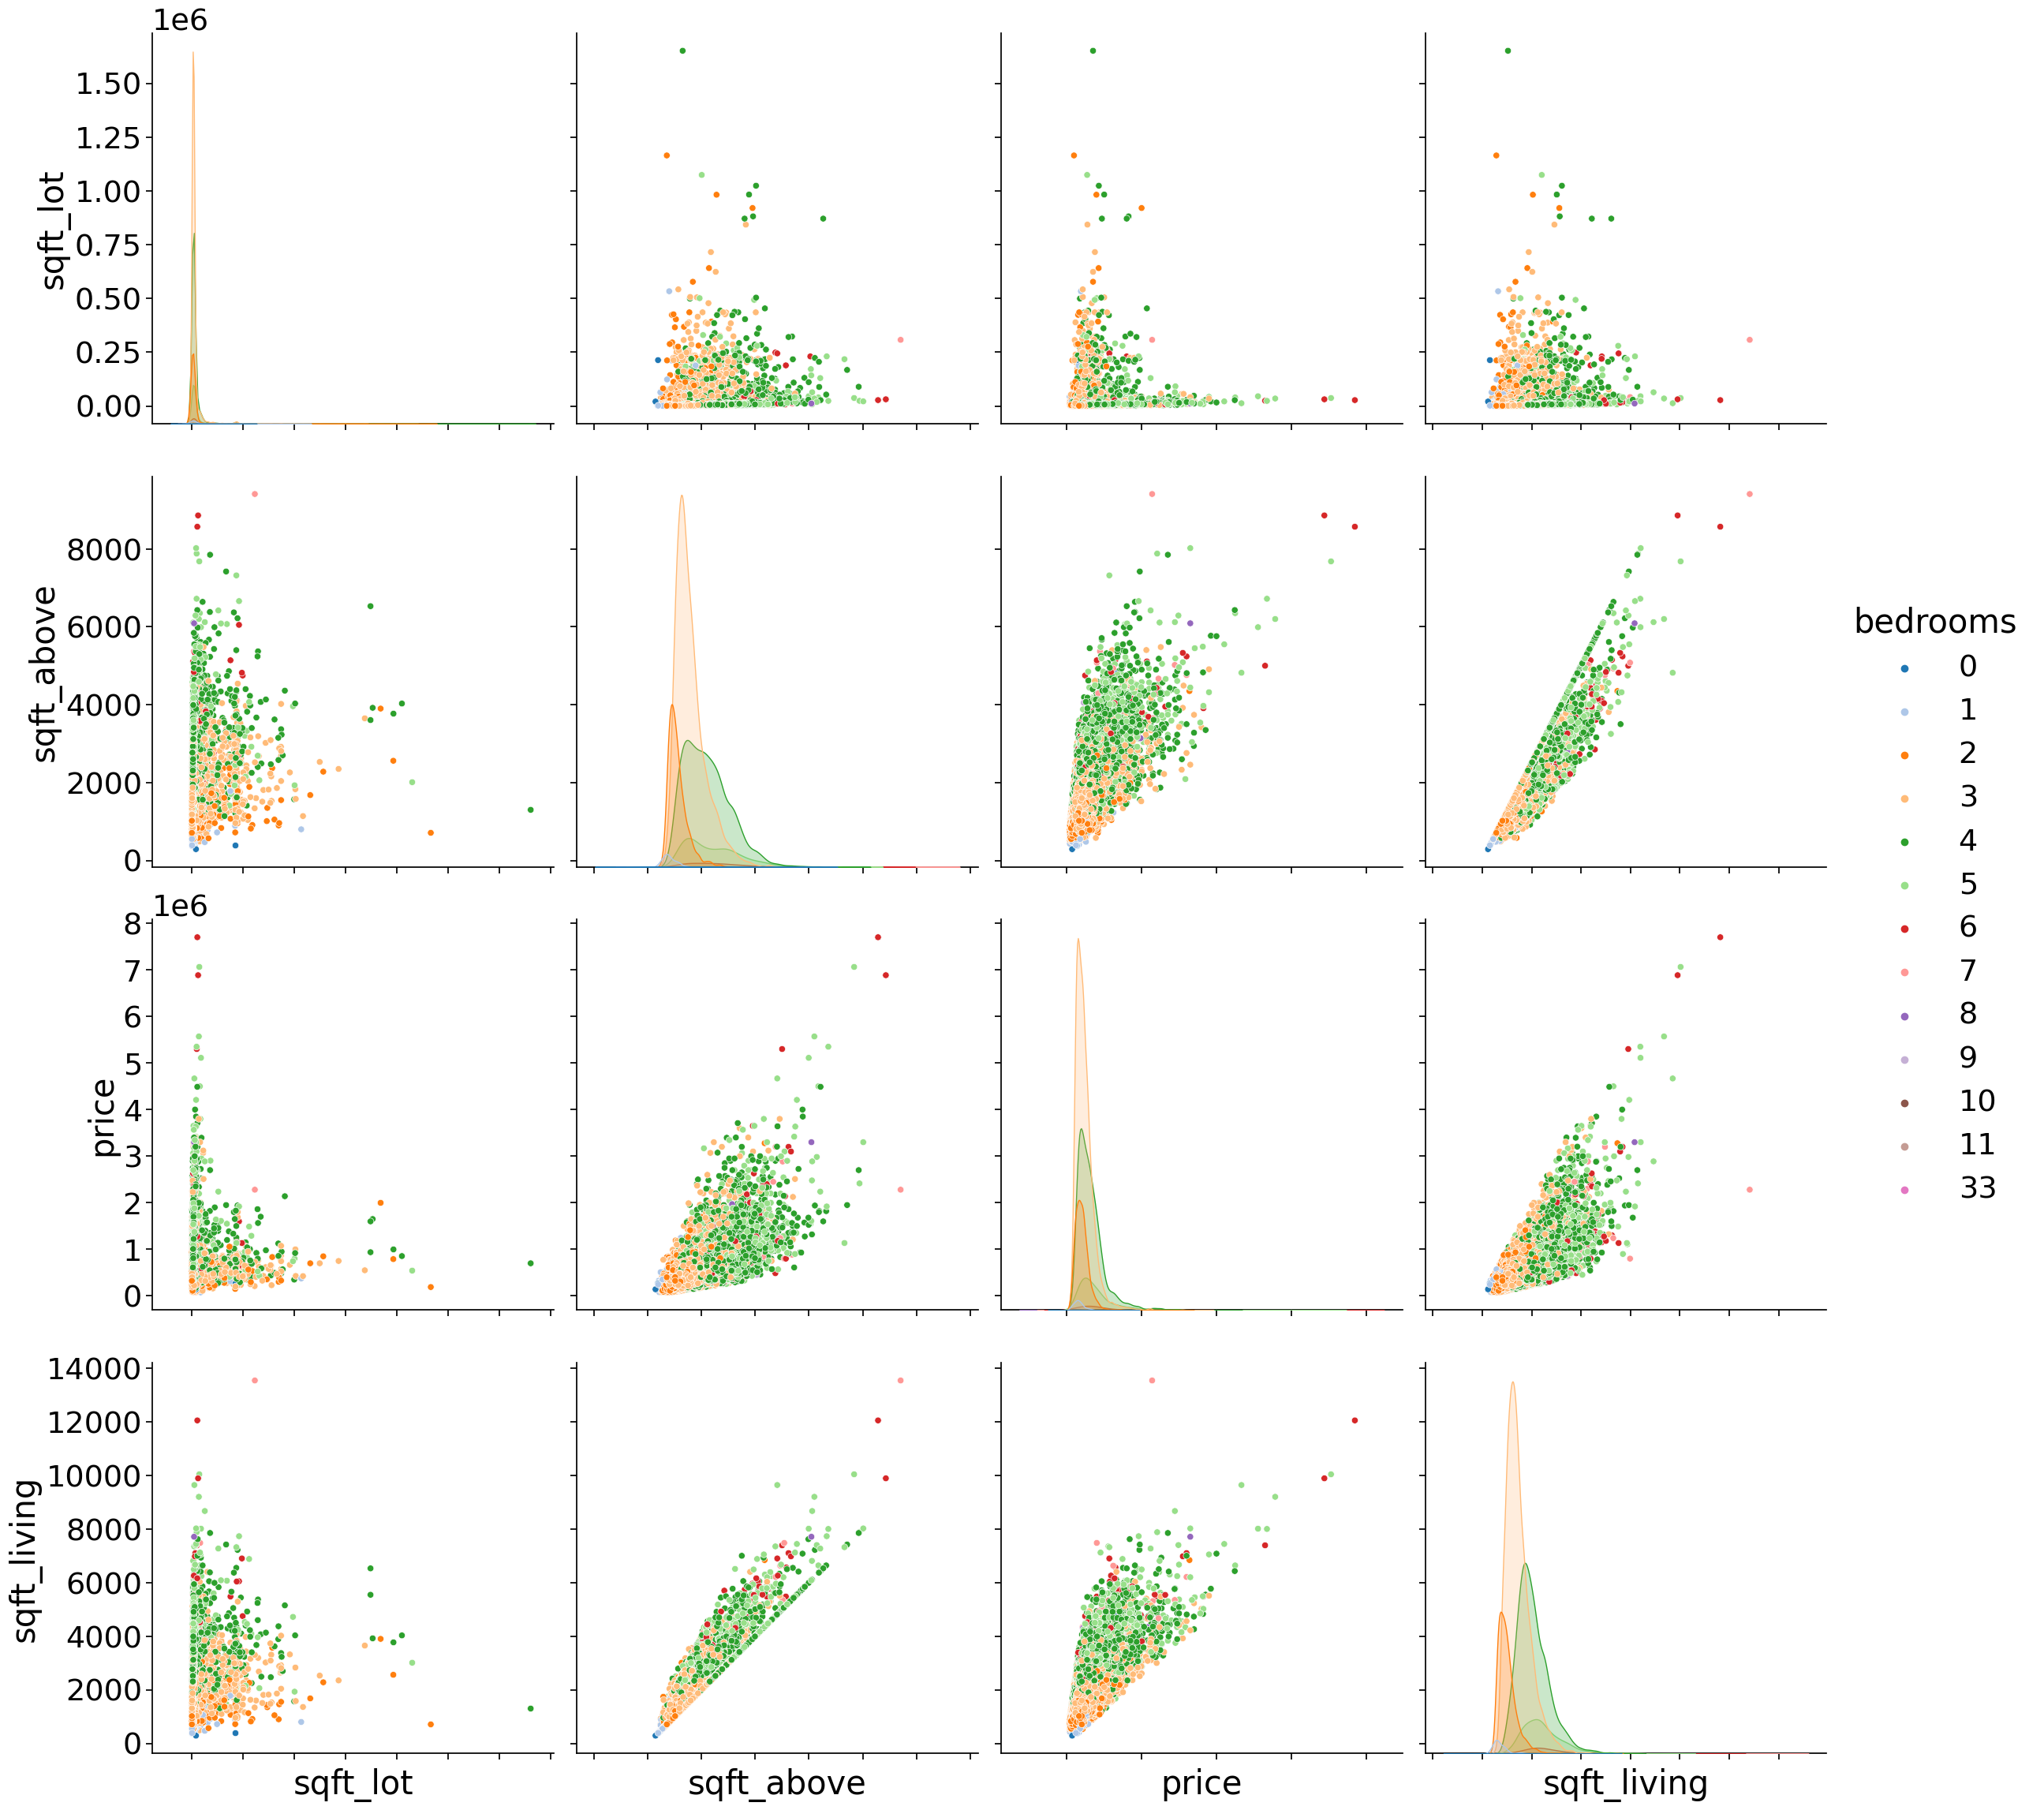

In [13]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

From the pairplots, we seem to get the classical linear distribution of the data points, for example with price against sqft_living. This bodes well as in the latter analysis, we will implement some linear models which we will use in our Feature ranking. Let's look at the correlation heatmap:

C:\Users\HP\AppData\Local\Temp\ipykernel_21244\3100390562.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, colvalue in data.iteritems():


<AxesSubplot: title={'center': 'Pearson Correlation of features'}>

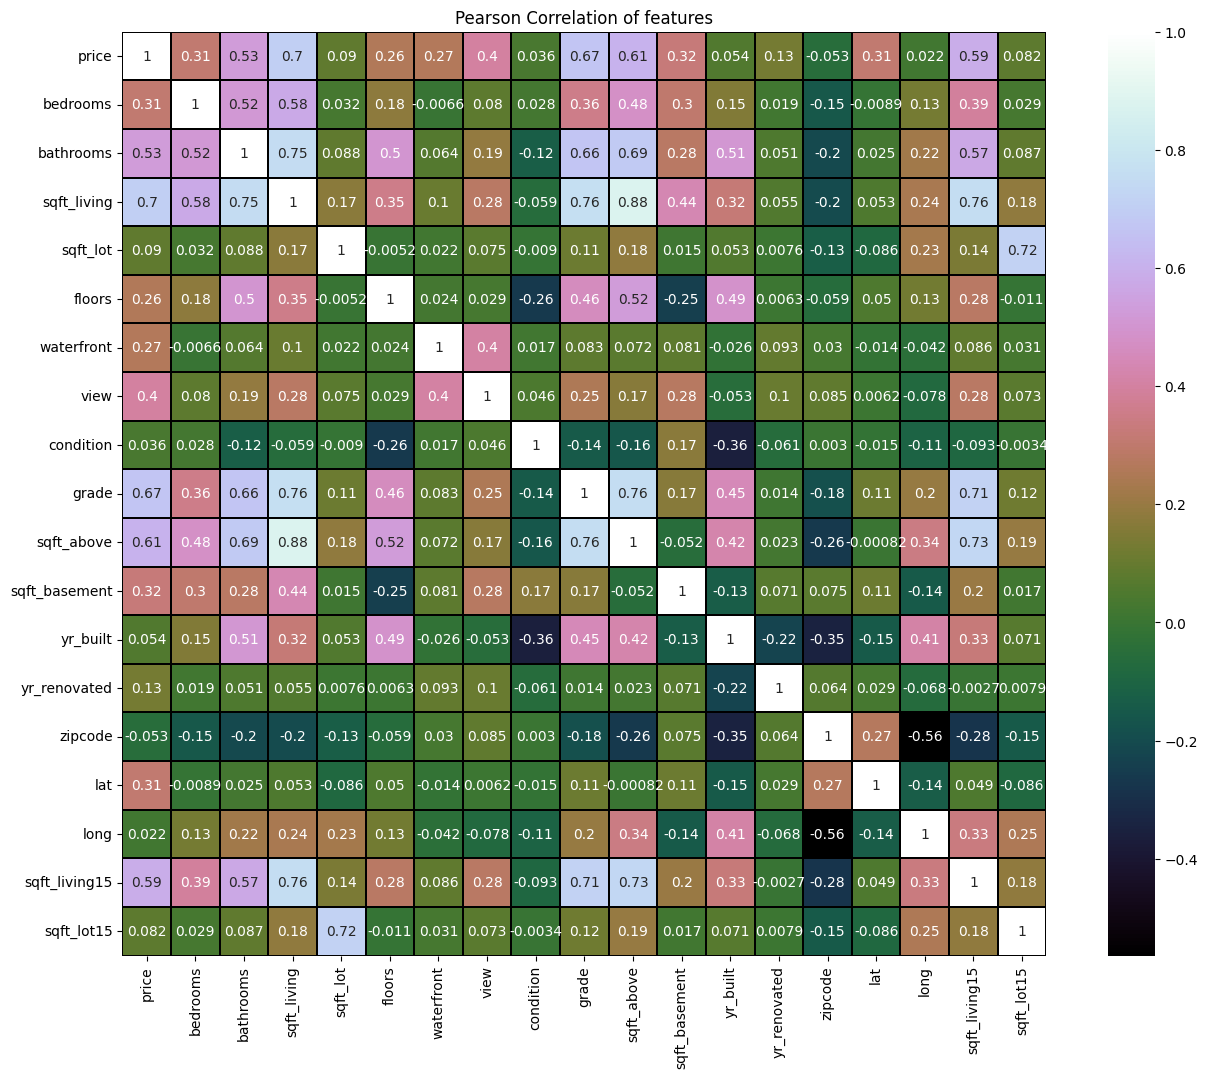

In [17]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = data[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

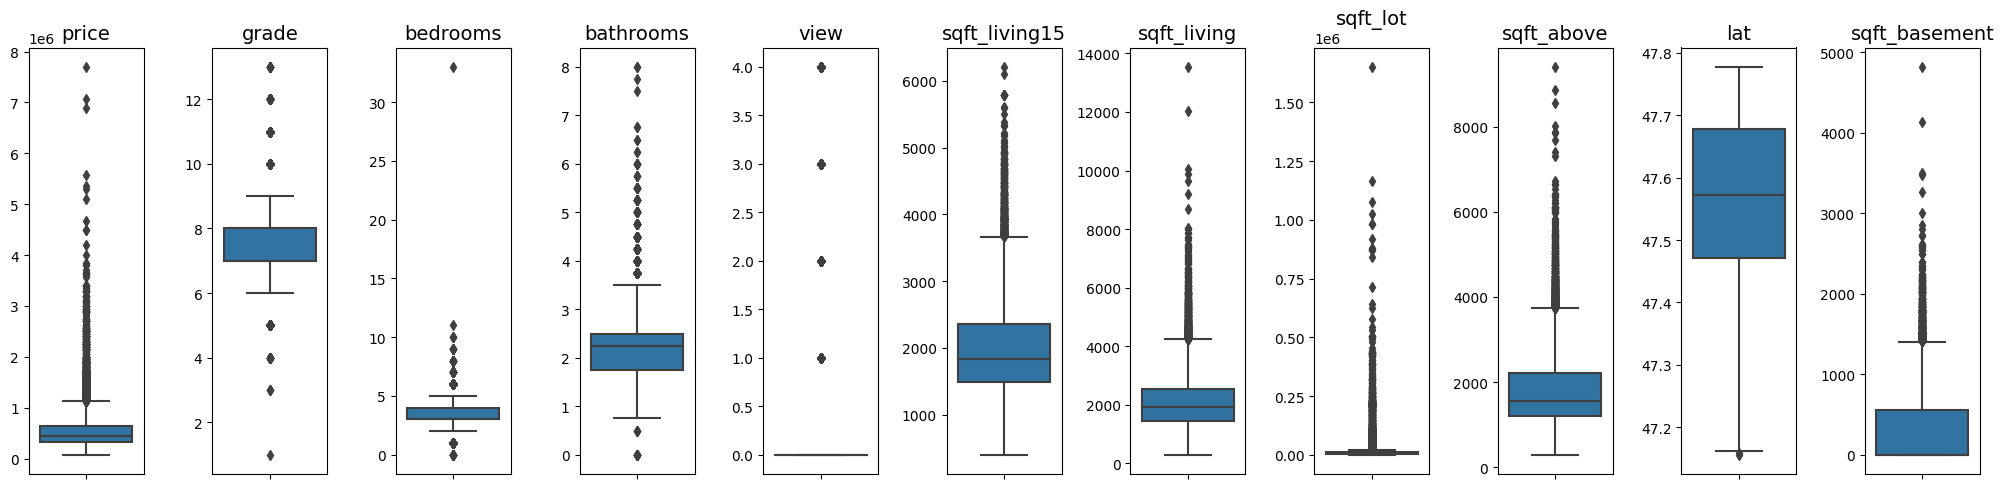

In [18]:
cols = ['price', 'grade','bedrooms', 'bathrooms','view','sqft_living15','sqft_living', 'sqft_lot', 'sqft_above','lat', 'sqft_basement']

fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    

plt.tight_layout()

# Show the plot
plt.show()

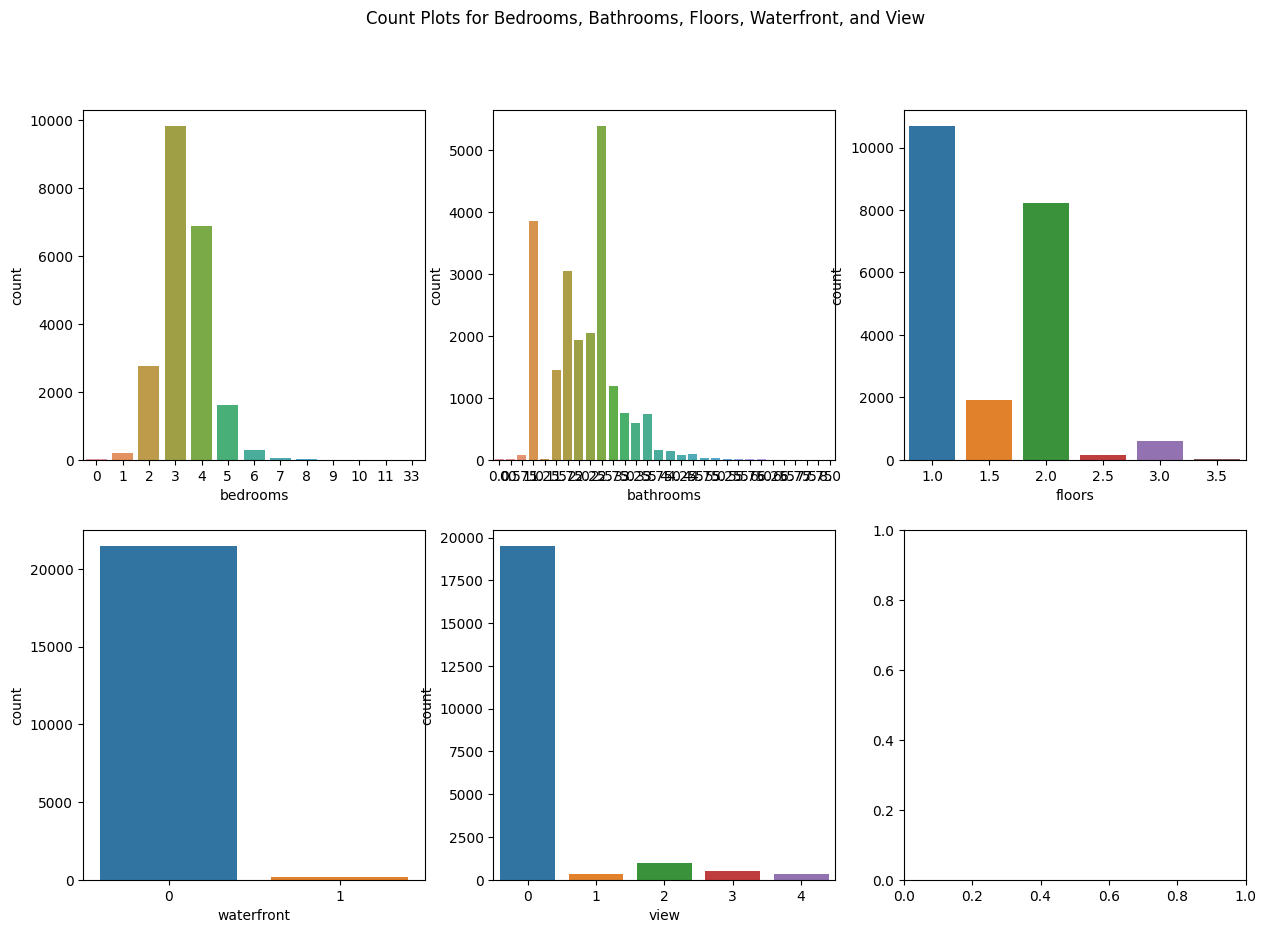

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create count plots for each variable and add them to the subplots
sns.countplot(x='bedrooms', data=data, ax=axes[0,0])
sns.countplot(x='bathrooms', data=data, ax=axes[0,1])
sns.countplot(x='floors', data=data, ax=axes[0,2])
sns.countplot(x='waterfront', data=data, ax=axes[1,0])
sns.countplot(x='view', data=data, ax=axes[1,1])

# Set the title for the entire plot
fig.suptitle("Count Plots for Bedrooms, Bathrooms, Floors, Waterfront, and View")

# Show the plot
plt.show()

<AxesSubplot: >

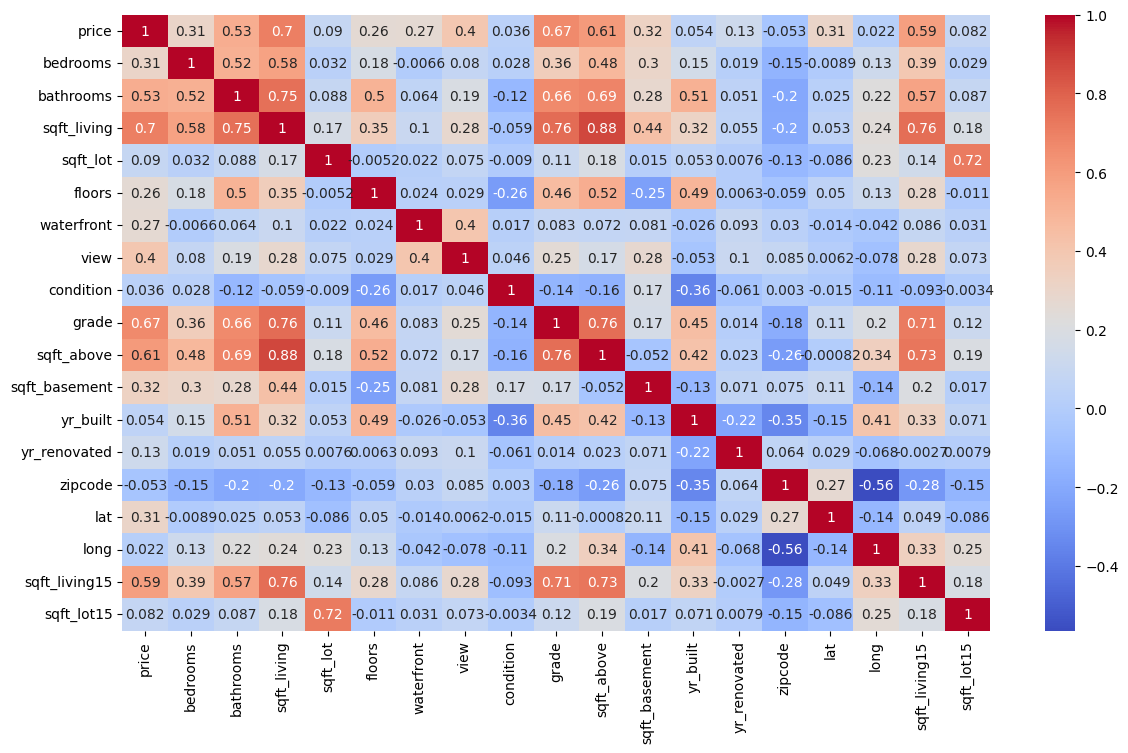

In [20]:
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

<AxesSubplot: xlabel='grade', ylabel='price'>

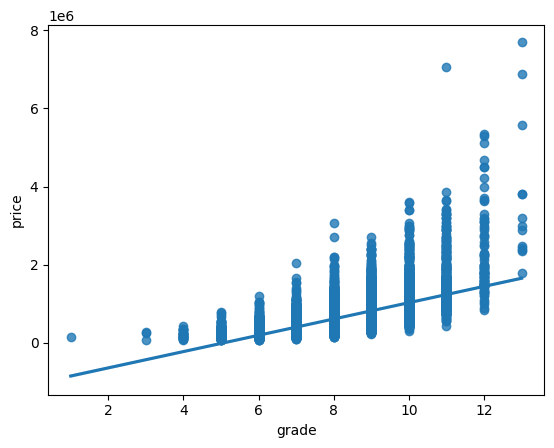

In [22]:
sns.regplot(x="grade", y ="price", data = data)

<AxesSubplot: xlabel='sqft_living15', ylabel='price'>

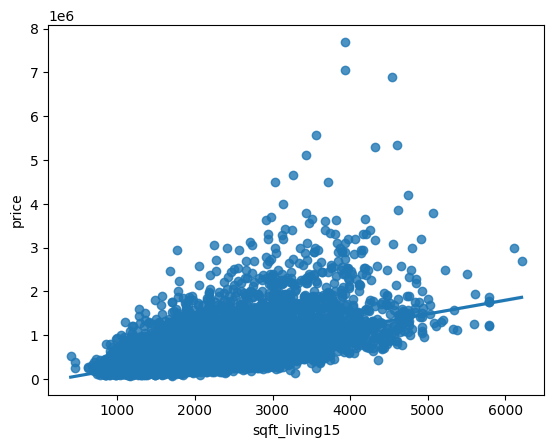

In [23]:
sns.regplot(x="sqft_living15", y ="price", data = data)

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

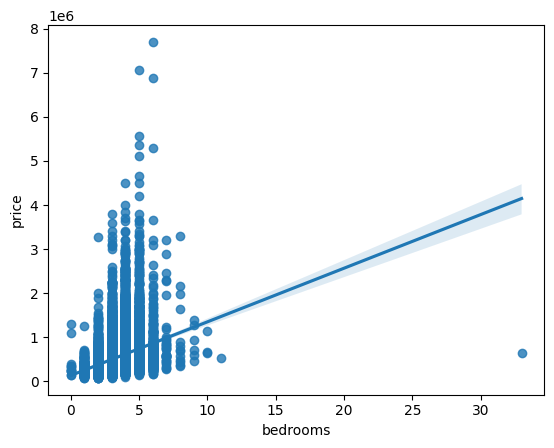

In [24]:
sns.regplot(x="bedrooms", y ="price", data = data)

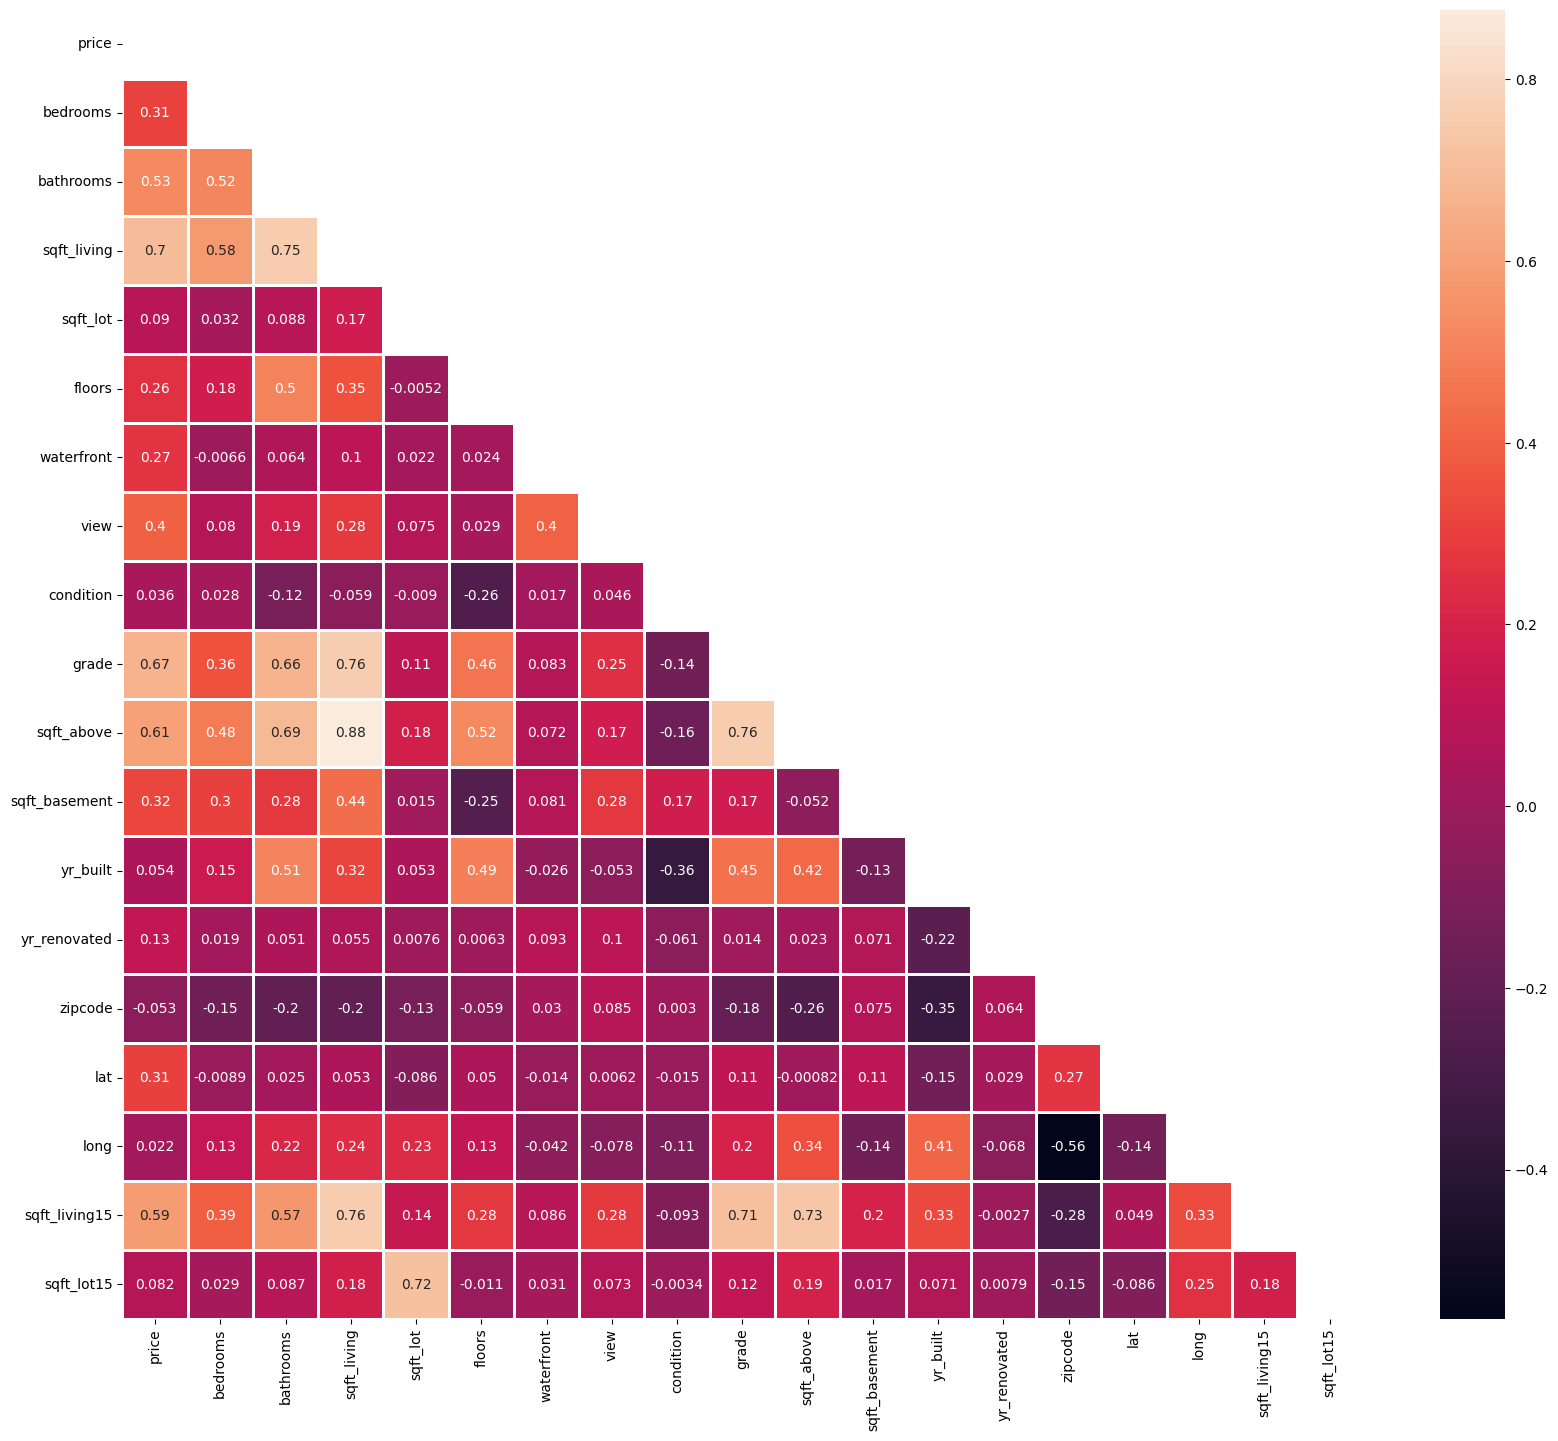

In [25]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

Graph for Price: Total = 4028


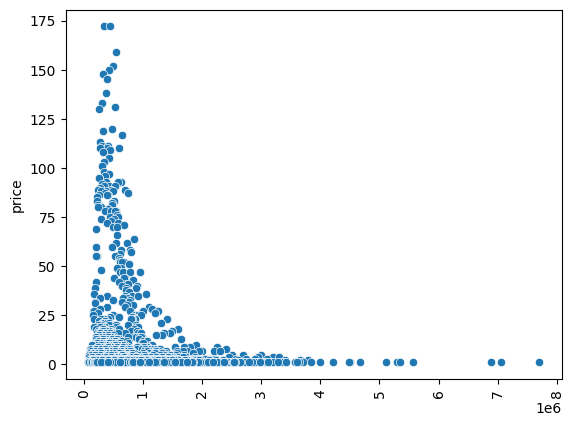

Graph for Bedrooms: Total = 13


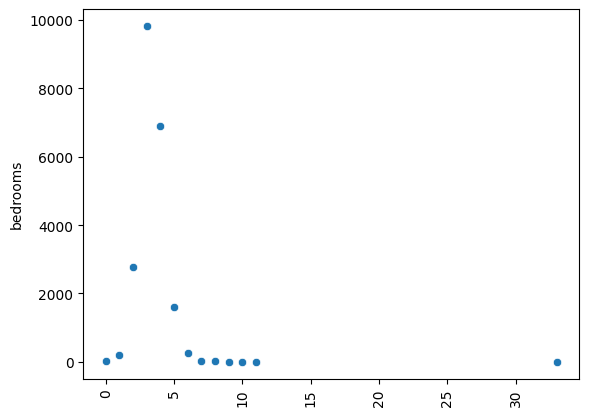

Graph for Bathrooms: Total = 30


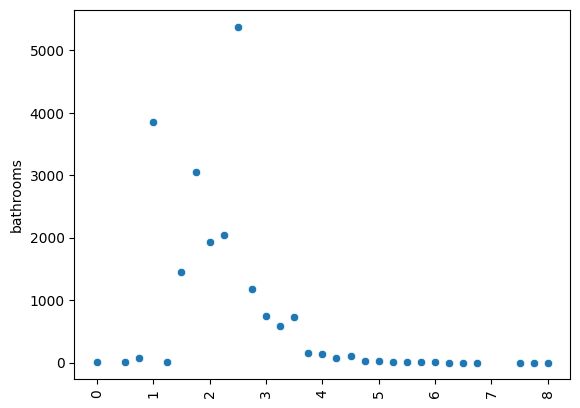

Graph for Sqft_living: Total = 1038


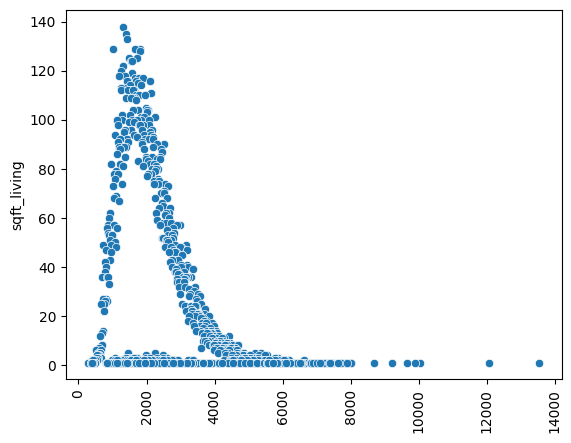

Graph for Sqft_lot: Total = 9782


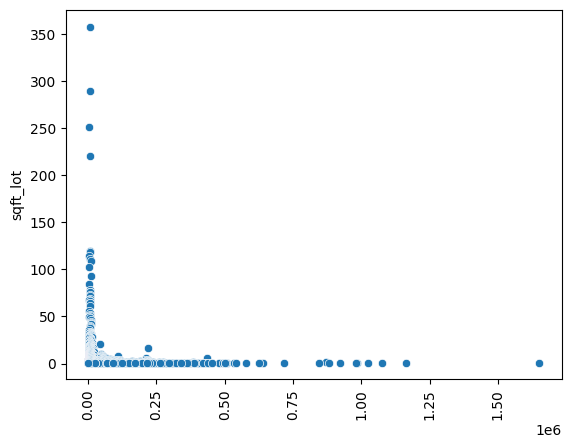

Graph for Floors: Total = 6


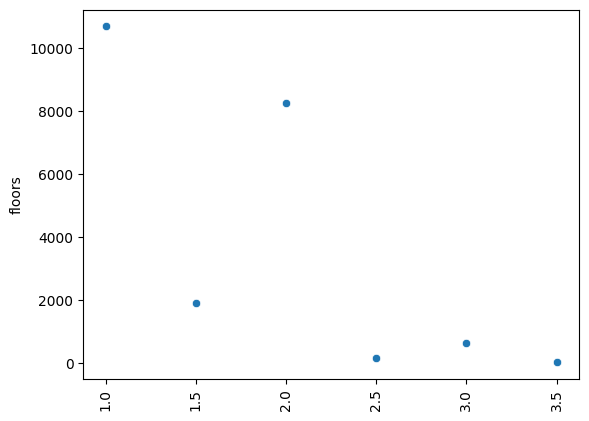

Graph for Waterfront: Total = 2


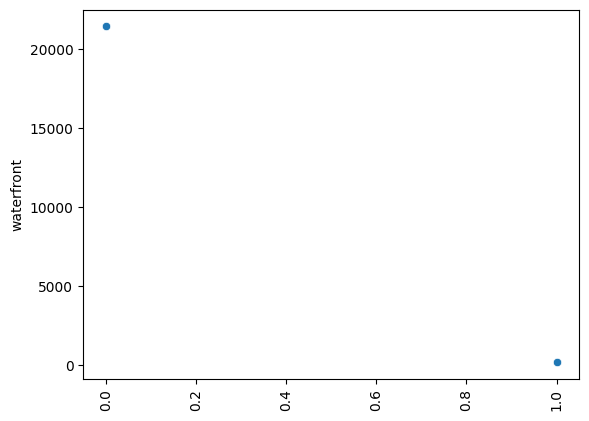

Graph for View: Total = 5


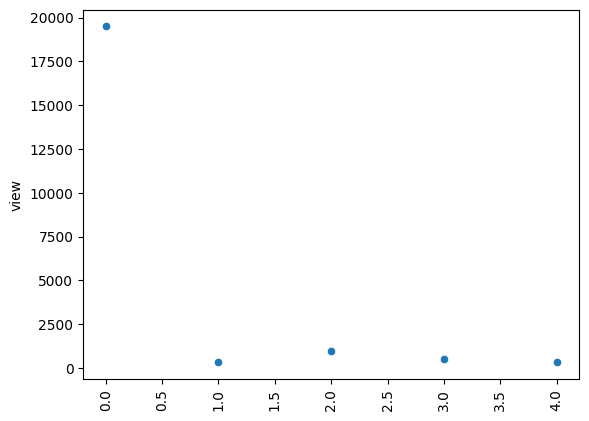

Graph for Condition: Total = 5


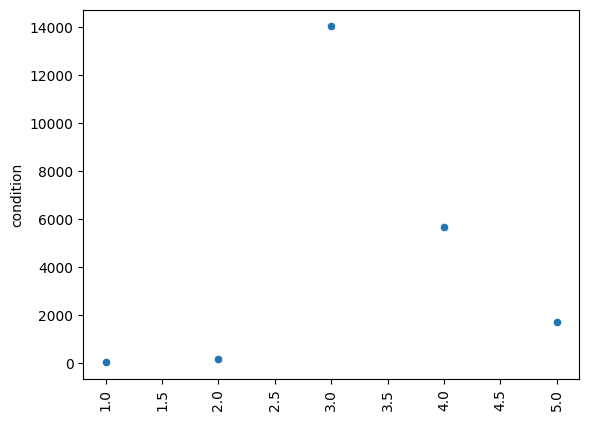

Graph for Grade: Total = 12


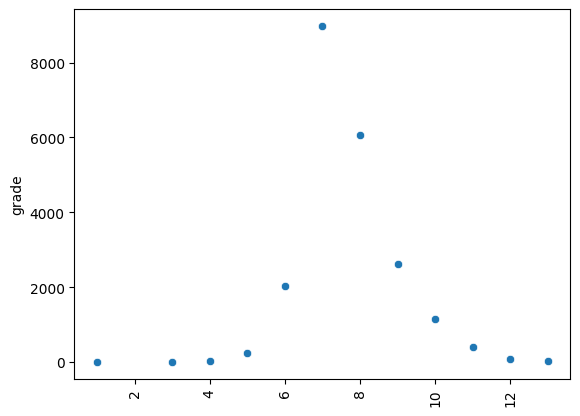

Graph for Sqft_above: Total = 946


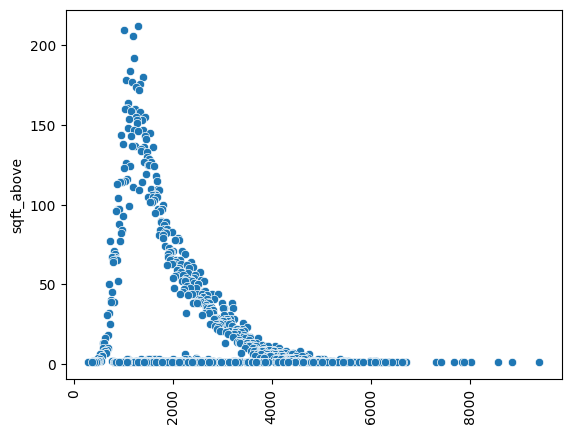

Graph for Sqft_basement: Total = 306


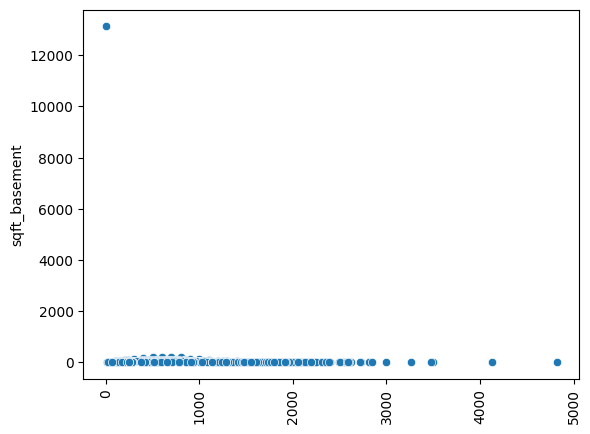

Graph for Yr_built: Total = 116


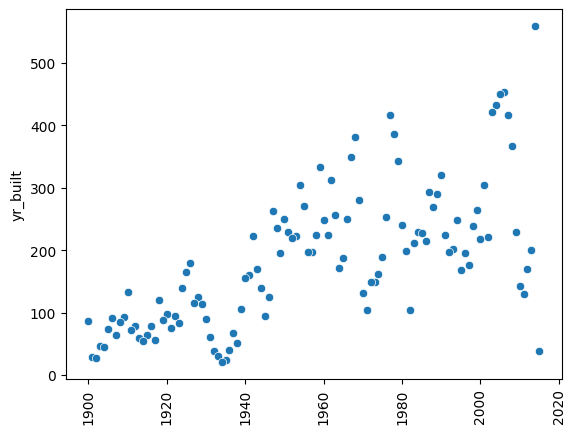

Graph for Yr_renovated: Total = 70


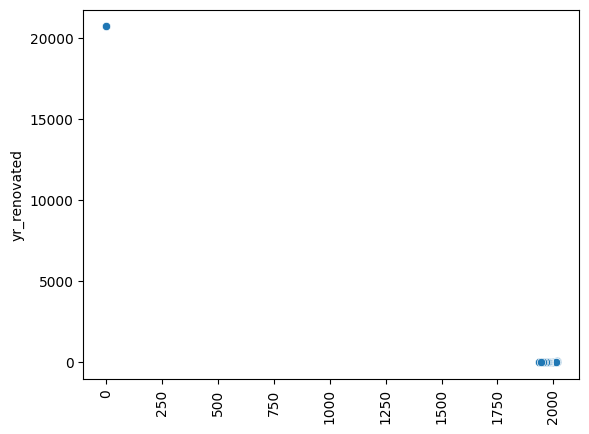

Graph for Zipcode: Total = 70


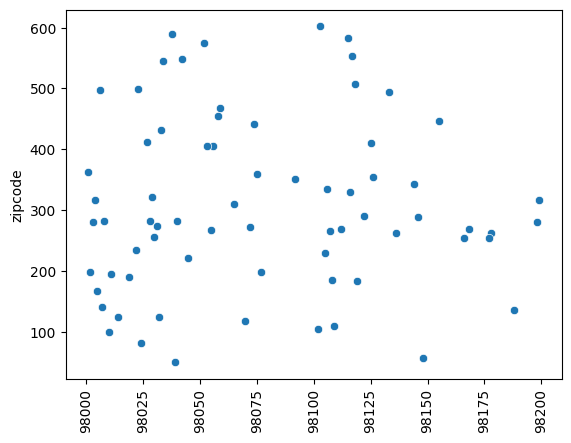

Graph for Lat: Total = 5034


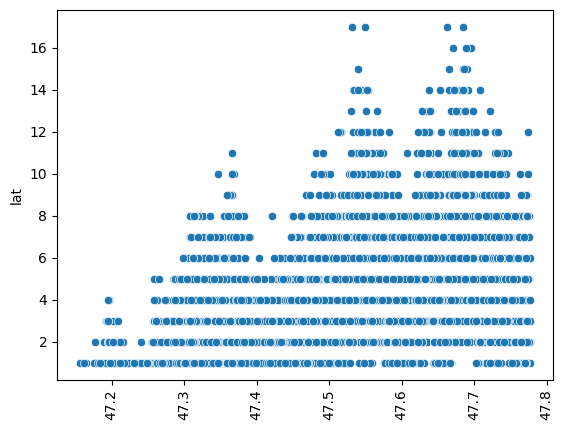

Graph for Long: Total = 752


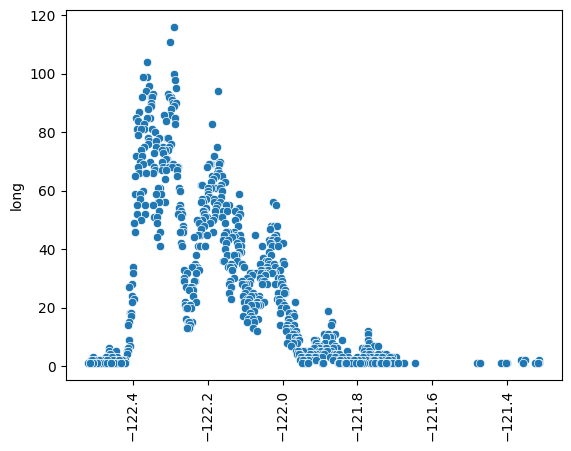

Graph for Sqft_living15: Total = 777


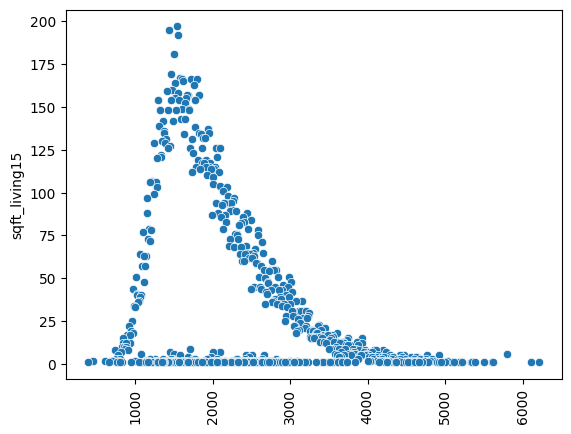

Graph for Sqft_lot15: Total = 8689


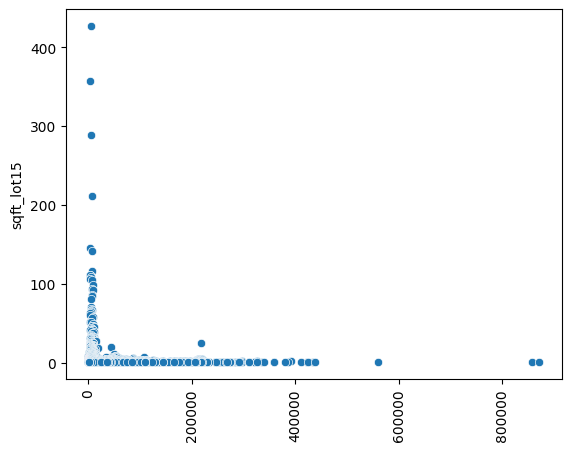

In [10]:

cols_to_plot = data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

Preprocessing the Data

In [12]:
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms', 
                'view', 'sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_data.values
y = data.price.values

Model Development & Evaluation

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_lm = model.predict(X_test)

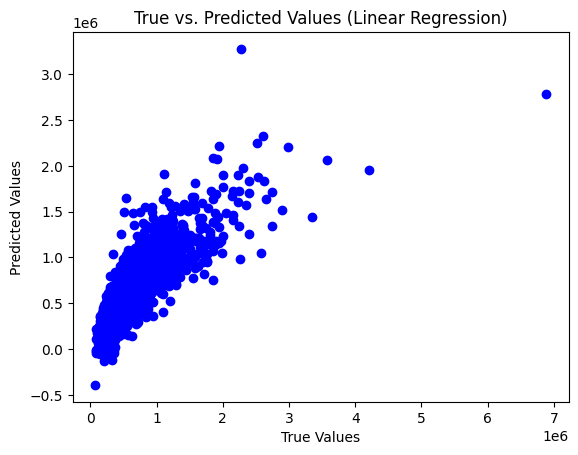

In [49]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred_lm, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Linear Regression)')
plt.show()


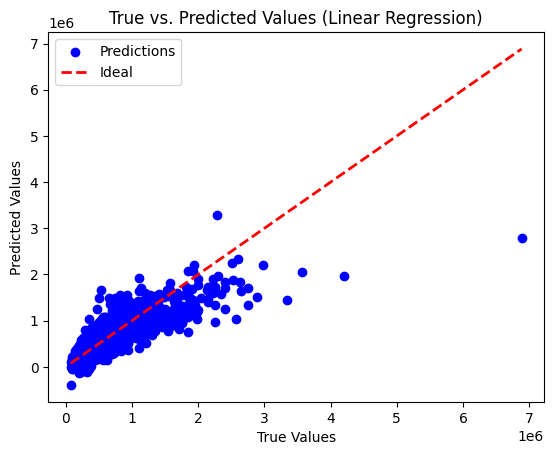

In [50]:
import numpy as np

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, y_pred_lm, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Linear Regression)')
plt.legend()
plt.show()


In [18]:
import math


In [19]:
print("RMSE: %.2f" % math.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)))
print("Model Score: ", model.score(X_test, y_test))

RMSE: 196145.12
Model Score:  0.6832437638256137


In [20]:
from sklearn.linear_model import Lasso

In [21]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
 
# Evaluate model performance on test set
y_pred = lasso.predict(X_test)

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.519e+13, tolerance: 2.388e+11
  model = cd_fast.enet_coordinate_descent(


In [22]:
# Model Score
print("Model Score: ", lasso.score(X_test, y_test))
print("RMSE: %.2f" % math.sqrt(np.mean((y_pred - y_test) ** 2)))

Model Score:  0.6829881712355071
RMSE: 196224.23


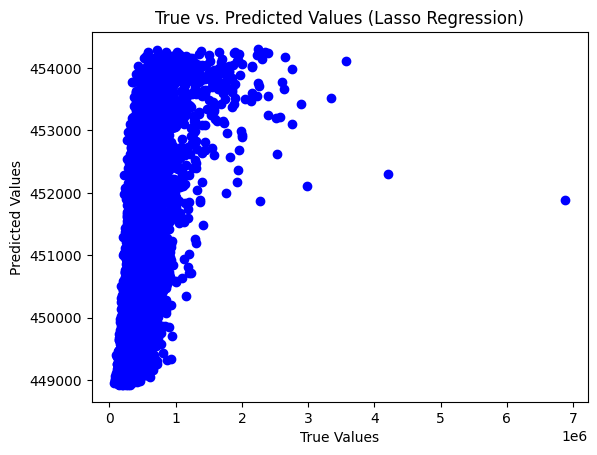

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.show()


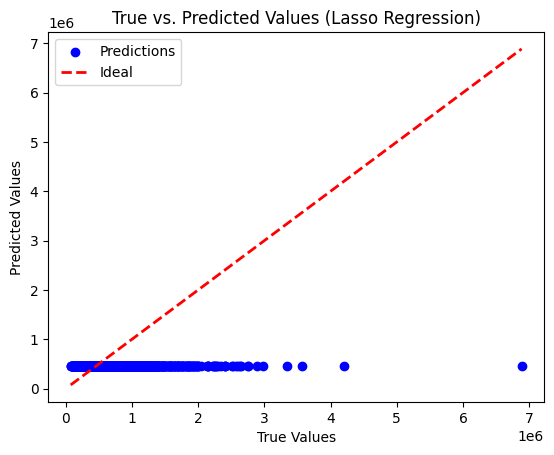

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.legend()
plt.show()


In [23]:
from sklearn.tree import DecisionTreeRegressor 

In [24]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [25]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
# Model Score
print("Model Score: ", regressor.score(X_test, y_test))
print("RMSE: %.2f" % math.sqrt(np.mean((y_pred - y_test) ** 2)))

Model Score:  0.6394795813526093
RMSE: 209256.93


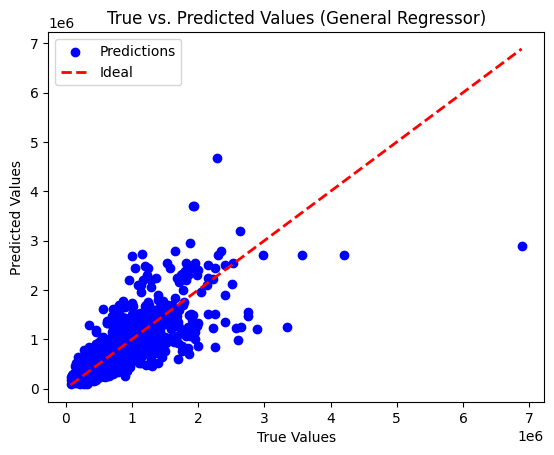

In [53]:
# Predict using the general regressor model
y_pred = regressor.predict(X_test)

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (General Regressor)')
plt.legend()
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
 
rf_regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [29]:
y_pred = rf_regressor.predict(X_test)

In [30]:
# Model Score
print("Model Score: ", rf_regressor.score(X_test, y_test))
print("RMSE: %.2f" % math.sqrt(np.mean((y_pred - y_test) ** 2)))

Model Score:  0.8178464181614045
RMSE: 148742.05


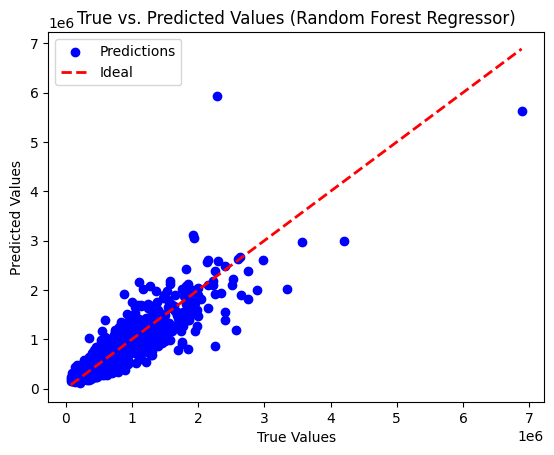

In [54]:
# Predict using the Random Forest regressor model
y_pred = rf_regressor.predict(X_test)

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()


In [31]:
from sklearn.svm import SVR

In [32]:
sv_regressor = SVR(kernel='rbf')
sv_regressor.fit(X,y)

SVR()

In [33]:

y_pred = sv_regressor.predict(X_test)

In [35]:
# Model Score
print("Model Score: ", sv_regressor.score(X_test, y_test))
print("RMSE: %.2f" % math.sqrt(np.mean((y_pred - y_test) ** 2)))

Model Score:  -0.04998562438438725
RMSE: 357113.76


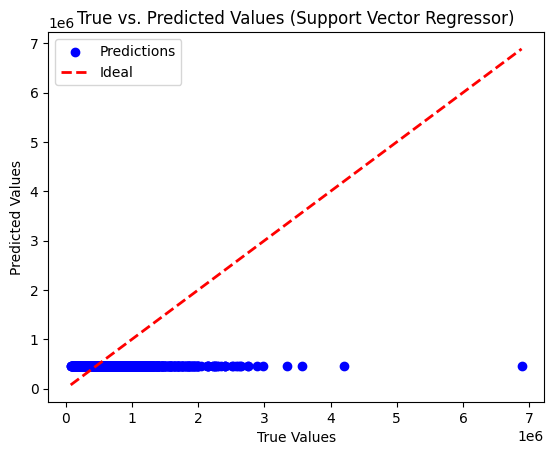

In [55]:
# Predict using the SVR regressor model
y_pred = sv_regressor.predict(X_test)

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Support Vector Regressor)')
plt.legend()
plt.show()


In [38]:
from xgboost import XGBRegressor


In [39]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
yhat_pred_xgboost = model_xgboost.predict(X_test)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [48]:
cross_val_xgboost = round(np.mean(cross_val_score(model_xgboost,X_train,y_train)),4)
R2_xgboost = round(r2_score(y_test, yhat_pred_xgboost),4)
MAE_xgboost = int(mean_absolute_error(y_test,yhat_pred_xgboost))
MAE_xgboost

81589

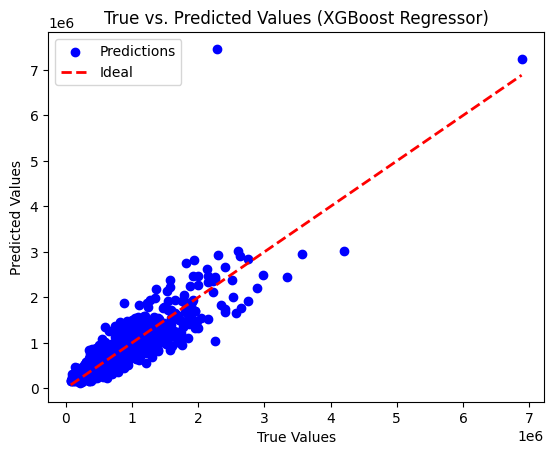

In [56]:
# Predict using the XGBoost regressor model
yhat_pred_xgboost = model_xgboost.predict(X_test)

# Scatter plot with the ideal 45-degree line
plt.scatter(y_test, yhat_pred_xgboost, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (XGBoost Regressor)')
plt.legend()
plt.show()
